In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('sign_mnist_train.csv')
test=pd.read_csv('sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels=train['label'].values

In [5]:
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [6]:
import seaborn as sns

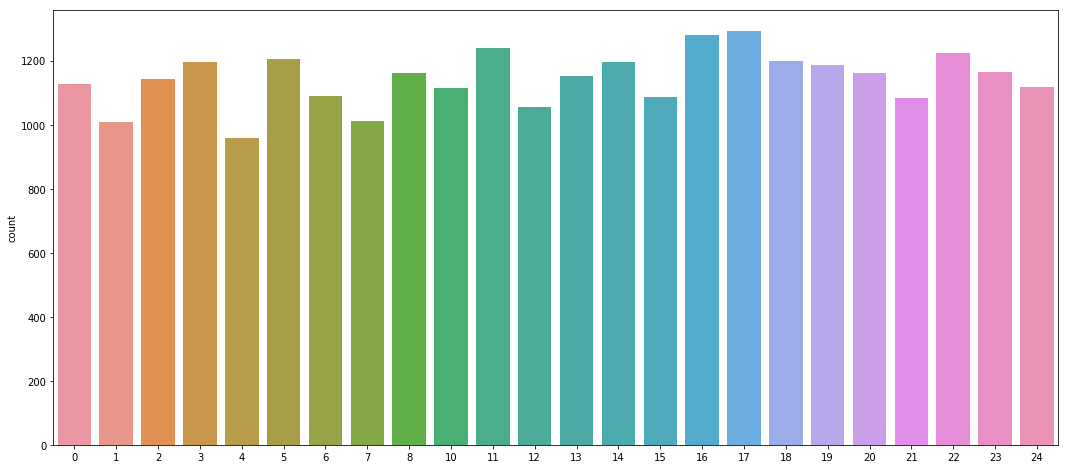

In [7]:
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [8]:
train.drop('label',axis=1,inplace=True)

In [11]:
images=train.values
images=np.array([np.reshape(i,(28,28)) for i in images])
images=np.array([i.flatten() for i in images])

In [12]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer=LabelBinarizer()
labels=label_binarizer.fit_transform(labels)

In [13]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

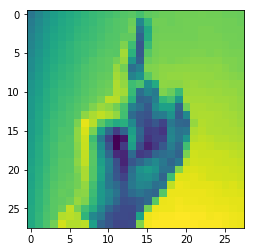

In [14]:
plt.imshow(images[0].reshape(28,28))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size=0.3,random_state=101)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

F:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
batch_size=128
num_classes=24
epochs=20

In [19]:
x_train=x_train/255
x_test=x_test/255

In [21]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

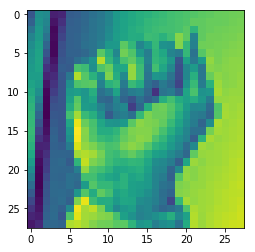

In [22]:
plt.imshow(x_train[0].reshape(28,28))

In [23]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [24]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [27]:
his = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/20
19218/19218 [==============================] - 46s 2ms/step - loss: 0.9121 - acc: 0.6911 - val_loss: 0.5770 - val_acc: 0.8254
Epoch 2/20
19218/19218 [==============================] - 46s 2ms/step - loss: 0.5826 - acc: 0.7994 - val_loss: 0.3793 - val_acc: 0.8842
Epoch 3/20
19218/19218 [==============================] - 46s 2ms/step - loss: 0.3886 - acc: 0.8671 - val_loss: 0.2442 - val_acc: 0.9283
Epoch 4/20
19218/19218 [==============================] - 47s 2ms/step - loss: 0.2736 - acc: 0.9095 - val_loss: 0.1770 - val_acc: 0.9530
Epoch 5/20
19218/19218 [==============================] - 46s 2ms/step - loss: 0.1897 - acc: 0.9385 - val_loss: 0.0981 - val_acc: 0.9740
Epoch 6/20
19218/19218 [==============================] - 46s 2ms/step - loss: 0.1404 - acc: 0.9542 - val_loss: 0.0728 - val_acc: 0.9817
Epoch 7/20
19218/19218 [==============================] - 46s 2ms/step - loss: 0.1016 - acc: 0.9693 - val_loss: 0.0489 - val_acc:

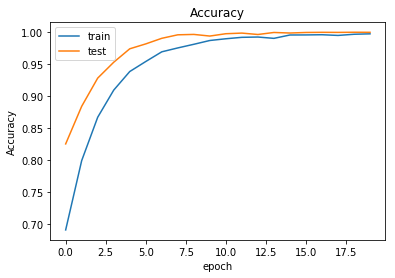

In [28]:
plt.plot(his.history['acc'])
plt.plot(his.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()

In [29]:
test_labels=test['label']

In [30]:
model.save_weights('sign.h5')

In [31]:
test.drop('label',axis=1,inplace=True)

In [32]:
test_images=test.values
test_images=np.array([np.reshape(i,(28,28)) for i in test_images])
test_images=np.array([i.flatten() for i in test_images])
test_labels=label_binarizer.fit_transform(test_labels)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [33]:
y_pred=model.predict(test_images)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred.round())

0.897345231455661
